# Analysis of Iterative Optimization Results

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
dir_path = "files/Buffalo_Display"

binary_trees_iterative = pd.read_csv(f"{dir_path}/binary-trees-Iterative-COMPLETE-0.csv", index_col=[0])
cacheprof_iterative = pd.read_csv(f"{dir_path}/cacheprof-Iterative-COMPLETE-0.csv", index_col=[0])
fem_iterative = pd.read_csv(f"{dir_path}/fem-Iterative-COMPLETE-0.csv", index_col=[0])
grep_iterative = pd.read_csv(f"{dir_path}/grep-Iterative-COMPLETE-0.csv", index_col=[0])
prolog_iterative = pd.read_csv(f"{dir_path}/prolog-Iterative-COMPLETE-0.csv", index_col=[0])
rsa_iterative = pd.read_csv(f"{dir_path}/rsa-Iterative-COMPLETE-0.csv", index_col=[0])
sorting_iterative = pd.read_csv(f"{dir_path}/sorting-Iterative-COMPLETE-0.csv", index_col=[0])
tables = [binary_trees_iterative, cacheprof_iterative, fem_iterative, grep_iterative, prolog_iterative, rsa_iterative, sorting_iterative]

## Improvements

### Normalize Data (Z-Score)


In [3]:
binary_trees_iterative_norm = binary_trees_iterative.copy()
binary_trees_iterative_norm["Runtime"] = (binary_trees_iterative_norm["Runtime"] - binary_trees_iterative_norm["Runtime"].mean())/binary_trees_iterative_norm["Runtime"].std()
binary_trees_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

cacheprof_iterative_norm = cacheprof_iterative.copy()
cacheprof_iterative_norm["Runtime"] = (cacheprof_iterative_norm["Runtime"] - cacheprof_iterative_norm["Runtime"].mean())/cacheprof_iterative_norm["Runtime"].std()
cacheprof_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

fem_iterative_norm = fem_iterative.copy()
fem_iterative_norm["Runtime"] = (fem_iterative_norm["Runtime"] - fem_iterative_norm["Runtime"].mean())/fem_iterative_norm["Runtime"].std()
fem_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

grep_iterative_norm = grep_iterative.copy()
grep_iterative_norm["Runtime"] = (grep_iterative_norm["Runtime"] - grep_iterative_norm["Runtime"].mean())/grep_iterative_norm["Runtime"].std()
grep_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

prolog_iterative_norm = prolog_iterative.copy()
prolog_iterative_norm["Runtime"] = (prolog_iterative_norm["Runtime"] - prolog_iterative_norm["Runtime"].mean())/prolog_iterative_norm["Runtime"].std()
prolog_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

rsa_iterative_norm = rsa_iterative.copy()
rsa_iterative_norm["Runtime"] = (rsa_iterative_norm["Runtime"] - rsa_iterative_norm["Runtime"].mean())/rsa_iterative_norm["Runtime"].std()
rsa_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

sorting_iterative_norm = sorting_iterative.copy()
sorting_iterative_norm["Runtime"] = (sorting_iterative_norm["Runtime"] - sorting_iterative_norm["Runtime"].mean())/sorting_iterative_norm["Runtime"].std()
sorting_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

normalized_tables = [binary_trees_iterative_norm, cacheprof_iterative_norm, fem_iterative_norm, grep_iterative_norm, prolog_iterative_norm, rsa_iterative_norm, sorting_iterative_norm]
tick_labels = ["bin_tree","cacheprof","fem","grep","prolog","rsa","sorting"]

### Plot Improvements

#### Box Plot

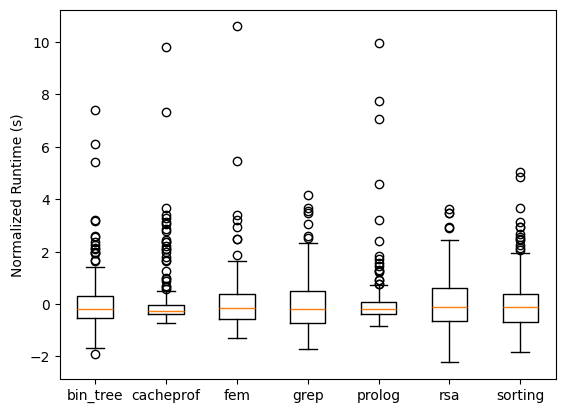

In [4]:
fig, ax = plt.subplots()

#ax.boxplot([binary_trees_iterative_norm["Runtime"],])
lst1 = []

for t in normalized_tables:
    lst1.append(t["Runtime"])

ax.boxplot(lst1)
ax.set_xticklabels(tick_labels)
ax.set_ylabel("Normalized Runtime (s)")

plt.show()

## Ideal preset for each program

In [5]:
binary_trees_best = binary_trees_iterative[binary_trees_iterative['Runtime'] == binary_trees_iterative["Runtime"].min()].iloc[0]
cacheprof_best = cacheprof_iterative[cacheprof_iterative['Runtime'] == cacheprof_iterative["Runtime"].min()].iloc[0]
fem_best = fem_iterative[fem_iterative['Runtime'] == fem_iterative["Runtime"].min()].iloc[0]
grep_best = grep_iterative[grep_iterative['Runtime'] == grep_iterative["Runtime"].min()].iloc[0]
prolog_best = prolog_iterative[prolog_iterative['Runtime'] == prolog_iterative["Runtime"].min()].iloc[0]
rsa_best = rsa_iterative[rsa_iterative['Runtime'] == rsa_iterative["Runtime"].min()].iloc[0]
sorting_best = sorting_iterative[sorting_iterative['Runtime'] == sorting_iterative["Runtime"].min()].iloc[0]

best_list = [binary_trees_best, cacheprof_best, fem_best, grep_best, prolog_best, rsa_best, sorting_best]
best_names = ["binary_trees","cacheprof","fem","grep","prolog","rsa","sorting"]


In [6]:
ideal_table = pd.DataFrame(columns=["Program", "ID", "Flags","Runtime"])

i = 0
for r in best_list:
    ideal_table.loc[len(ideal_table.index)] = [best_names[i], r["ID"], r["Flags"], r["Runtime"]]
    i += 1

pd.set_option('display.max_colwidth', None)
ideal_table

,Program,ID,Flags,Runtime
0,binary_trees,14084414-c029-4bba-9a9f-7e50ed0f22c7,['-O0' '-fliberate-case-threshold=2000' '-fexcess-precision'\n '-fno-opt-coercion' '-ffloat-in' '-funfolding-dict-discount=30'\n '-fvectorise' '-fpedantic-bottoms' '-fcmm-sink'\n '-funfolding-keeness-factor=1.5' '-fvectorise'\n '-funfolding-use-threshold=60' '-fregs-iterative' '-fcse'\n '-funbox-small-strict-fields' '-funfolding-creation-threshold=750'\n '-fcross-module-specialise' '-fexpose-all-unfoldings' '-fstrictness'\n '-fspec-constr-count=3' '-fcross-module-specialise' '-ffloat-in'\n '-fliberate-case' '-fno-opt-coercion' '-fexcess-precision'\n '-fliberate-case-threshold=2000' '-foptimal-applicative-do'\n '-fexpose-all-unfoldings' '-fexpose-all-unfoldings'\n '-fmax-simplifier-iterations=4' '-fno-state-hack'\n '-fdo-lambda-eta-expansion' '-fignore-interface-pragmas'\n '-funfolding-fun-discount=60'],6.888
1,cacheprof,ef125713-0d4a-40a4-88c6-866f5ce173fa,['-O0' '-fdo-eta-reduction' '-fdo-lambda-eta-expansion'\n '-fomit-interface-pragmas' '-fsimpl-tick-factor=100' '-fcase-merge'\n '-fcase-merge' '-fdicts-strict' '-fmax-relevant-binds=6'\n '-fdo-eta-reduction' '-flate-dmd-anal' '-fsimpl-tick-factor=100'\n '-feager-blackholing' '-fmax-inline-memcpy-insns=32'\n '-fsimplifier-phases=2' '-funfolding-dict-discount=30'\n '-foptimal-applicative-do' '-fno-opt-coercion' '-fspecialise'\n '-fexcess-precision' '-fdo-eta-reduction' '-fstrictness'\n '-floopification' '-fspec-constr-count=3' '-fmax-inline-alloc-size=128'\n '-funfolding-creation-threshold=750' '-fcse' '-fdicts-cheap'\n '-fmax-inline-alloc-size=128' '-fmax-inline-alloc-size=128'\n '-ffun-to-thunk' '-fvectorise' '-feager-blackholing' '-floopification'\n '-fexpose-all-unfoldings' '-ffun-to-thunk' '-fspec-constr-threshold=2000'\n '-ffun-to-thunk' '-fdicts-strict' '-fmax-inline-alloc-size=128'\n '-fworker-wrapper' '-funfolding-creation-threshold=750' '-fliberate-case'],2.389
2,fem,33ec775a-e624-4dd4-94a3-2586f4f9c08d,['-O0' '-fmax-inline-memcpy-insns=32' '-fsimpl-tick-factor=100'\n '-ffull-laziness' '-funfolding-creation-threshold=750'\n '-fexpose-all-unfoldings' '-funbox-small-strict-fields'\n '-fno-pre-inlining' '-funfolding-fun-discount=60' '-fcase-merge'\n '-funfolding-creation-threshold=750' '-fworker-wrapper'\n '-fworker-wrapper' '-fmax-inline-alloc-size=128'\n '-fignore-interface-pragmas' '-fsimplifier-phases=2' '-fno-opt-coercion'\n '-funfolding-use-threshold=60' '-funfolding-dict-discount=30'\n '-fvectorisation-avoidance' '-fsimplifier-phases=2' '-fdo-eta-reduction'\n '-fstatic-argument-transformation' '-funfolding-keeness-factor=1.5'\n '-funfolding-use-threshold=60' '-funbox-small-strict-fields'\n '-fstatic-argument-transformation' '-funfolding-fun-discount=60'\n '-fcmm-sink' '-fmax-inline-memcpy-insns=32' '-fdo-eta-reduction'\n '-fregs-iterative' '-fspec-constr-count=3' '-ffull-laziness'\n '-feager-blackholing' '-fvectorisation-avoidance'\n '-fstatic-argument-transformation' '-fcross-module-specialise'\n '-fcmm-sink' '-funbox-small-strict-fields' '-fomit-interface-pragmas'\n '-fregs-iterative' '-fcpr-anal' '-fno-pre-inlining'\n '-fmax-worker-args=10' '-funfolding-fun-discount=60'\n '-fsimplifier-phases=2'],1.702
3,grep,e29c6613-3a42-4664-b197-5227869dfd27,['-O0' '-fmax-inline-alloc-size=128' '-fmax-inline-memcpy-insns=32'\n '-fmax-inline-memcpy-insns=32' '-fdicts-strict' '-feager-blackholing'],2.525
4,prolog,dc1db5a1-f512-4413-adb3-9e1e2aea5486,['-O0' '-fsimplifier-phases=2' '-fmax-inline-alloc-size=128'\n '-fmax-simplifier-iterations=4' '-fomit-interface-pragmas'\n '-fdo-eta-reduction' '-fdicts-strict' '-fpedantic-bottoms'\n '-fliberate-case-threshold=2000' '-fcall-arity' '-fdmd-tx-dict-sel'\n '-fpedantic-bottoms' '-fregs-iterative' '-fcall-arity'\n '-fcmm-elim-common-blocks' '-fenable-rewrite-rules'\n '-fignore-interface-pragmas' '-fcmm-elim-common-blocks'\n '-fmax-inline-memset-insns=32' '-funfolding-dict-discount=30'\n '-fdo-eta-reduction' '-fsimpl-tick-factor=100' '-fstrictness-before=1'\

In [7]:
pd.set_option('display.max_colwidth', 50)

## Comparison to O0 & O2

### Normalize (Min-Max)

In [8]:
binary_trees_iterative_norm = binary_trees_iterative.copy()
binary_trees_iterative_norm["Runtime"] = (binary_trees_iterative_norm["Runtime"] - binary_trees_iterative_norm["Runtime"].min())/(binary_trees_iterative_norm["Runtime"].max() - binary_trees_iterative_norm["Runtime"].min())
binary_trees_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

cacheprof_iterative_norm = cacheprof_iterative.copy()
cacheprof_iterative_norm["Runtime"] = (cacheprof_iterative_norm["Runtime"] - cacheprof_iterative_norm["Runtime"].min())/(cacheprof_iterative_norm["Runtime"].max() - cacheprof_iterative_norm["Runtime"].min())
cacheprof_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

fem_iterative_norm = fem_iterative.copy()
fem_iterative_norm["Runtime"] = (fem_iterative_norm["Runtime"] - fem_iterative_norm["Runtime"].min())/(fem_iterative_norm["Runtime"].max() - fem_iterative_norm["Runtime"].min())
fem_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

grep_iterative_norm = grep_iterative.copy()
grep_iterative_norm["Runtime"] = (grep_iterative_norm["Runtime"] - grep_iterative_norm["Runtime"].min())/(grep_iterative_norm["Runtime"].max() - grep_iterative_norm["Runtime"].min())
grep_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

prolog_iterative_norm = prolog_iterative.copy()
prolog_iterative_norm["Runtime"] = (prolog_iterative_norm["Runtime"] - prolog_iterative_norm["Runtime"].min())/(prolog_iterative_norm["Runtime"].max() - prolog_iterative_norm["Runtime"].min())
prolog_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

rsa_iterative_norm = rsa_iterative.copy()
rsa_iterative_norm["Runtime"] = (rsa_iterative_norm["Runtime"] - rsa_iterative_norm["Runtime"].min())/(rsa_iterative_norm["Runtime"].max() - rsa_iterative_norm["Runtime"].min())
rsa_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

sorting_iterative_norm = sorting_iterative.copy()
sorting_iterative_norm["Runtime"] = (sorting_iterative_norm["Runtime"] - sorting_iterative_norm["Runtime"].min())/(sorting_iterative_norm["Runtime"].max() - sorting_iterative_norm["Runtime"].min())
sorting_iterative_norm.drop(columns=["Elapsed_Time","Mode"])

normalized_tables = [binary_trees_iterative_norm, cacheprof_iterative_norm, fem_iterative_norm, grep_iterative_norm, prolog_iterative_norm, rsa_iterative_norm, sorting_iterative_norm]
tick_labels = ["bin_tree","cacheprof","fem","grep","prolog","rsa","sorting"]

### Bar Plots

[0 1 2]
[<Axes: > <Axes: > <Axes: >]


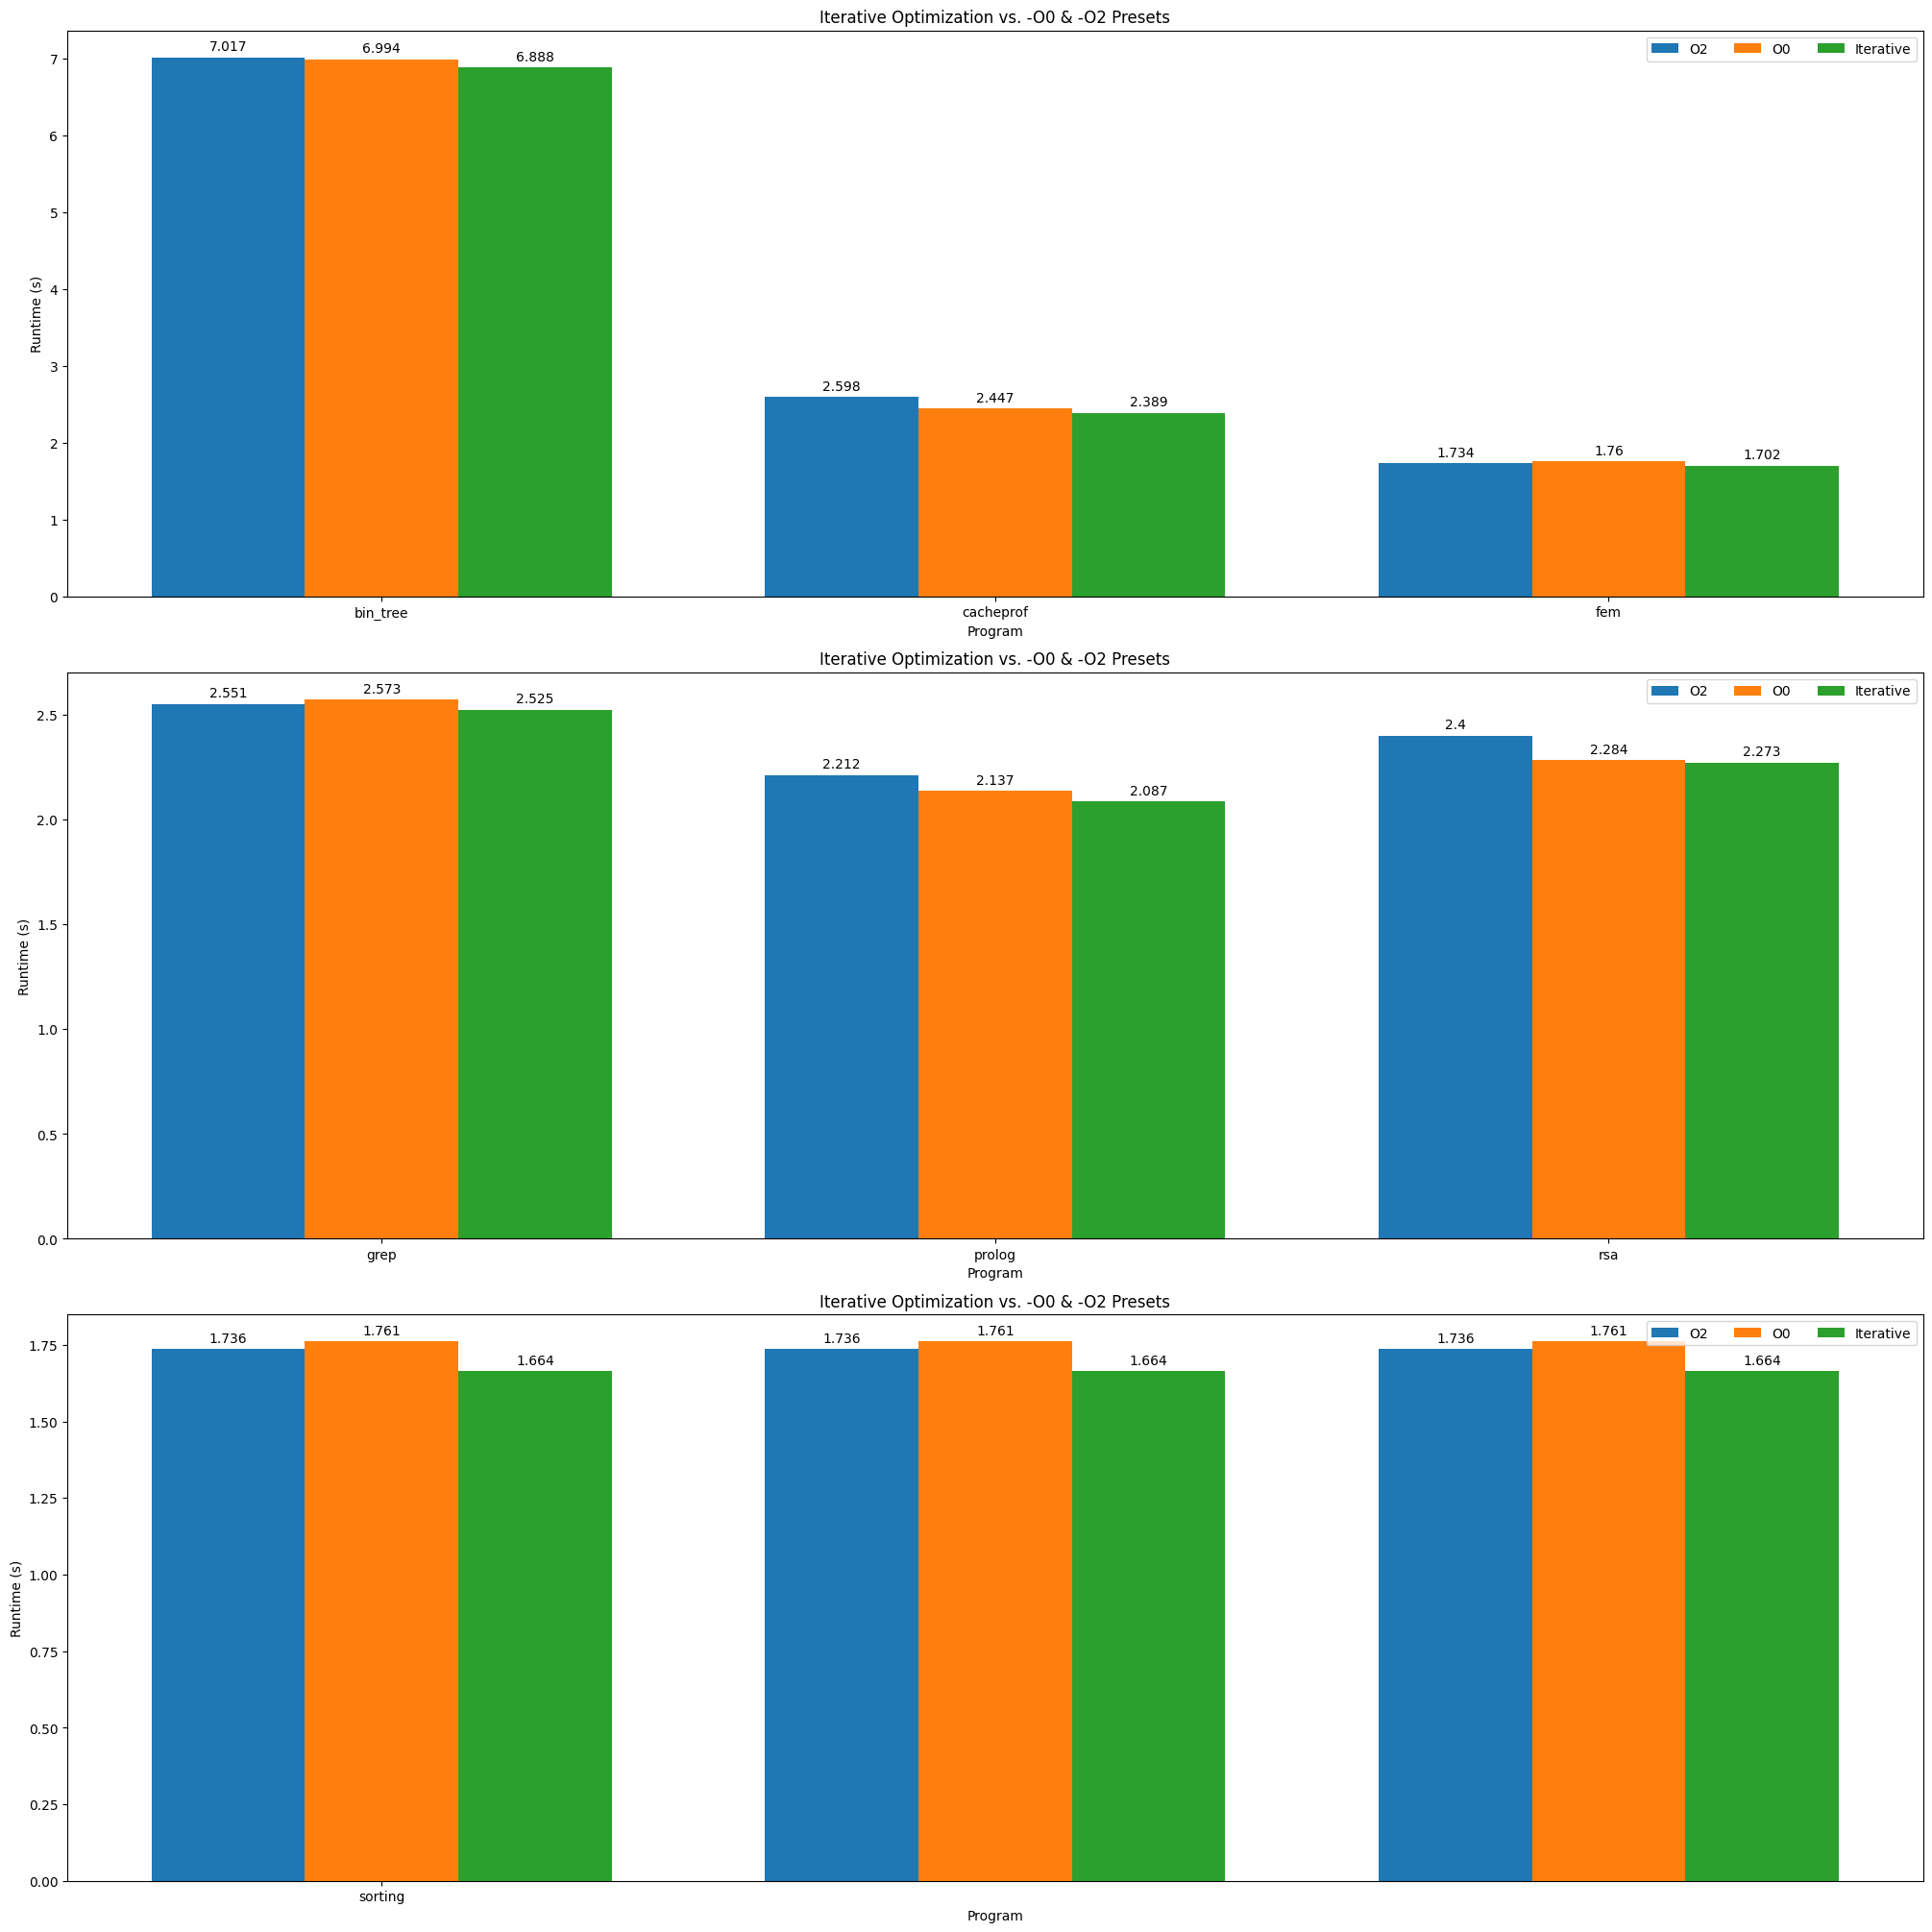

In [9]:
fig, axs = plt.subplots(3, layout='constrained')

split_list = [tables[i:i + 3] for i in range(0, len(tables), 3)]

prime_results = []
O0_results = []
O2_results = []

N = 3 #len(tick_labels)
ind = np.arange(N) 
width = 0.25

print(ind)
print(axs)

# Get the best value by ID and get the O0 and O2 entries by ID

i= 0
j = 0
for l in split_list:
    prime_results = []
    O0_results = []
    O2_results = []
    name_list = []
    for t  in l:
        prime_results.append(t[t["ID"] == best_list[i]["ID"]].iloc[0]["Runtime"])
        O0_results.append(t[t["ID"] == "-O0"].iloc[0]["Runtime"])
        O2_results.append(t[t["ID"] == "-O2"].iloc[0]["Runtime"])
        name_list.append(tick_labels[i])
        i += 1
    rects1 = axs[j].bar(ind, O2_results, width, label="O2")
    rects2 = axs[j].bar(ind+width, O0_results, width, label="O0")
    rects3 = axs[j].bar(ind+width*2, prime_results, width, label="Iterative")
    axs[j].bar_label(rects1, padding=3)
    axs[j].bar_label(rects2, padding=3)
    axs[j].bar_label(rects3, padding=3)
    axs[j].set_xlabel("Program")
    axs[j].set_ylabel("Runtime (s)")
    axs[j].set_title("Iterative Optimization vs. -O0 & -O2 Presets")
    axs[j].legend(loc='best', ncols=3)
    #axs[j].set_xticks(ind + width, [])
    if len(name_list) == 3:
        axs[j].set_xticks(ind + width, name_list)
    else:
        axs[j].set_xticks([0 + width], name_list)
    #axs[j].set_xticklabels([])
    
    j += 1
    

fig.set_figheight(20)
fig.set_figwidth(20)

plt.show()

In [11]:
for t in tables:
    print(t["Runtime"].std())

0.08896343268109459
0.15141569993467177
0.04344429689545859
0.040788178124145556
0.08112905263226065
0.0427378552093211
0.027251272562667423


In [16]:
from scipy.stats import f_oneway

anova_result = f_oneway(tables[3]["Runtime"], tables[1]["Runtime"])
anova_result

F_onewayResult(statistic=116.97049683365945, pvalue=4.910951982755358e-25)